In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

Kernelized support vector machines
(often just referred to as **SVMs**) are an extension that allows for more complex models
that are not defined simply by hyperplanes in the input space

One way to make a linear model more flexible is by **adding more features**—for example, by adding interactions or polynomials of the input features.

Text(0, 0.5, 'Feature 1')

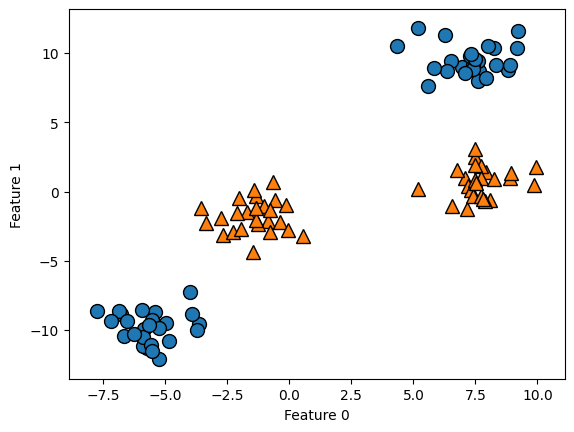

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

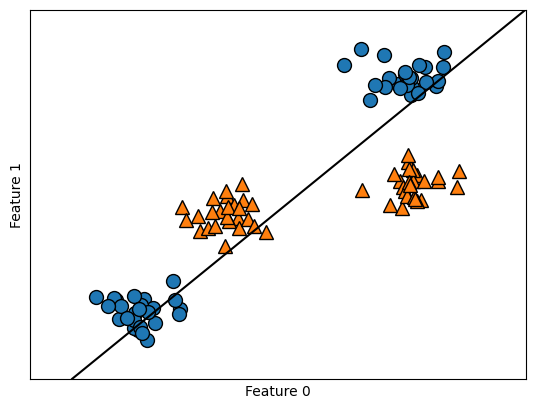

In [4]:
# Not a good job
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

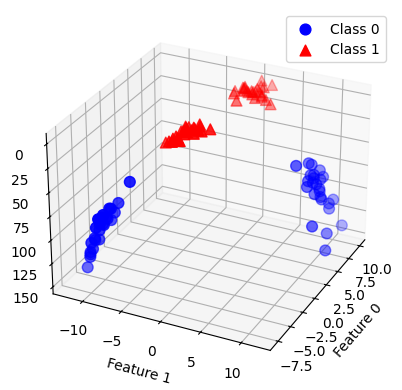

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming X and y are defined
# Add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

# Create a new figure for 3D plotting
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Mask for separating the classes
mask = y == 0

# Plot points where y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, label="Class 0")

# Plot points where y == 1
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, label="Class 1")

# Set axis labels
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

# Optional: Add a legend
ax.legend()

# Show the plot
plt.show()

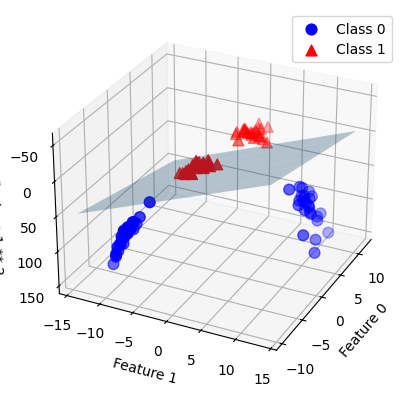

In [6]:
from sklearn.svm import LinearSVC

# Assuming X and y are defined
# Add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
# Train a linear SVM model
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# Create a new figure for 3D plotting
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)
# Create a mesh grid for plotting the decision boundary
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
# Plot the decision boundary
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
# Mask for separating the classes
mask = y == 0
# Plot points where y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, label="Class 0")
# Plot points where y == 1
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, label="Class 1")
# Set axis labels
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
# Optional: Add a legend
ax.legend()
# Show the plot
plt.show()

Text(0, 0.5, 'Feature 1')

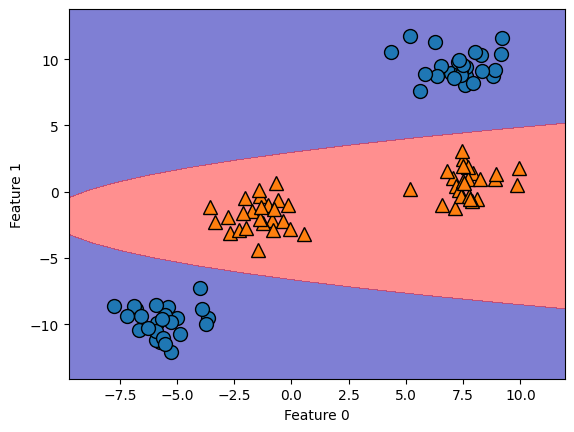

In [7]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Adding nonlinear features** to the representation of our data can
make linear models much more powerful. However, often we don’t know which features
to add.

Luckily, there is a clever mathematical trick that allows us to learn a classifier in a higher-dimensional
space without actually computing the new, possibly very large representation. This is
known as the **kernel trick**, and it works by directly computing the distance (more precisely,
the scalar products) of the data points for the expanded feature representation, without ever actually computing the expansion.

There are two ways to map your data into a higher-dimensional space that are commonly
used with support vector machines: the **polynomial kernel**, which computes all
possible polynomials up to a certain degree of the original features (like feature1 **
2 * feature2 ** 5); and the **radial basis function (RBF) kernel**, also known as the
Gaussian kernel.

Typically only a subset of the training points matter for defining the decision boundary: the ones that lie on the
border between the classes. These are called **support vectors** and give the support vector
machine its name.

To make a prediction for a new point, the **distance** to each of the support vectors is
measured. A classification decision is made based on the distances to the support vector,
and the importance of the support vectors that was learned during training

Text(0, 0.5, 'Feature 1')

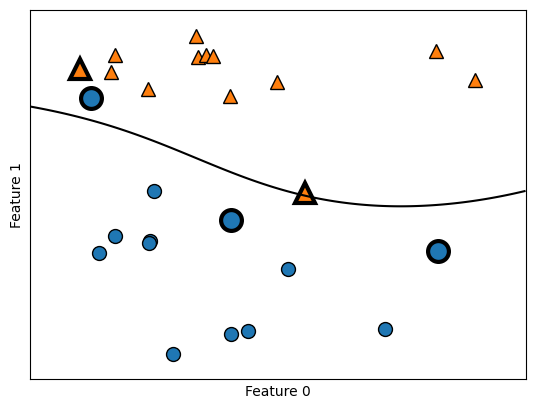

In [8]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The **gamma** parameter is the one shown in the formula given in the previous section,
which **controls the width of the Gaussian kernel**. It determines the scale of what it
means for points to be close together. The **C** parameter is a **regularization parameter**,
similar to that used in the linear models. It limits the importance of each point

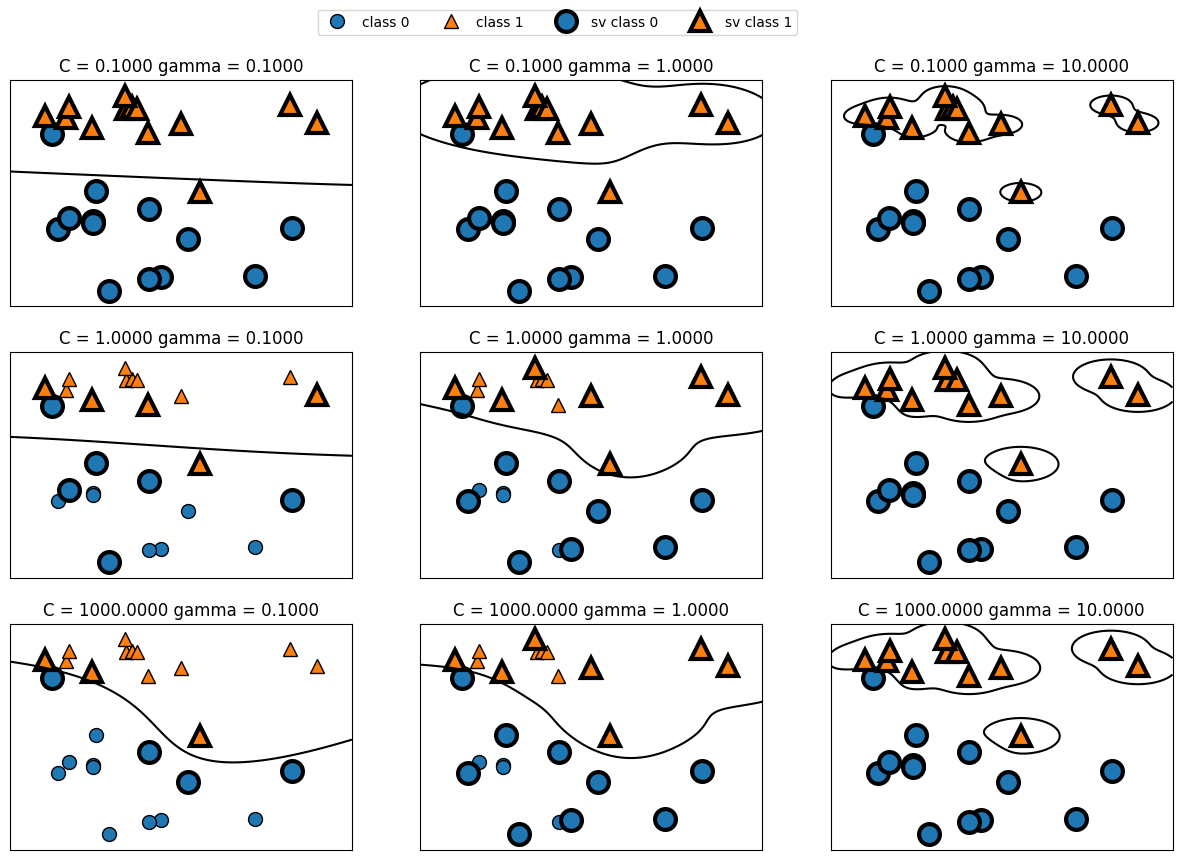

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
ncol=4, loc=(.9, 1.2))

A small gamma means a large radius for the Gaussian kernel, which means that many points are considered close by. This is reflected in very smooth decision boundaries
on the left, and boundaries that focus more on single points further to the right. A low value of gamma means that the decision boundary will vary slowly, which yields a
model of low complexity, while a high value of gamma yields a more complex model

small C means a very restricted model, where each data point can
only have very limited influence.

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


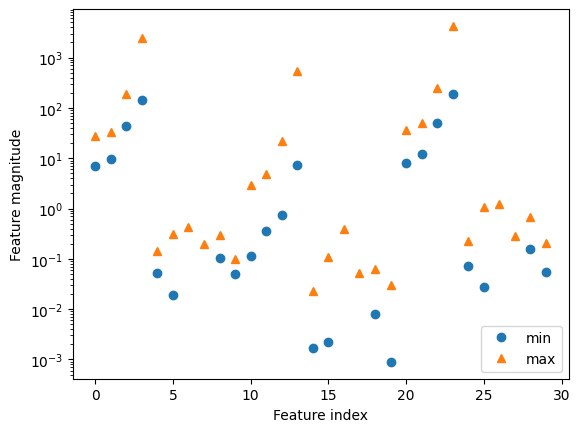

In [11]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

A common **rescaling method** for kernel SVMs is to
scale the data such that all features are between 0 and 1.

In [12]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [13]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


SVMs allow for complex decision boundaries, even if the data has only
a few features. They work well on low-dimensional and high-dimensional data (i.e.,
few and many features), but don’t scale very well with the number of samples

Another downside of SVMs is that they **require careful preprocessing of the data** and
**tuning of the parameters.**

The important parameters in kernel SVMs are the **regularization parameter C**, the
**choice of the kernel, and the kernel-specific parameters**